In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. PolyRectSphere

Original: https://www.ncnr.nist.gov/resources/sansmodels/PolyRectSphere.html

Author: Denis Korolkov

Calculates the form factor for a polydisperse population of spheres with uniform scattering length density. The distribution of radii is a rectangular (box) distribution. The form factor is normalized by the average particle volume.


## Parameters

Parameter|	Variable|	Value
---------|----------|--------
0|	Scale|	1.0
1|	Average Radius (Å)|	60.0
2|	Polydispersity (0-1)|	0.12
3|	Contrast ($Å^{-2}$)|	3.0e-6
4|	Incoherent Background($cm^{-1}$)|	0.000

## Usage notes

The returned value is scaled to units of cm^{-1}, absolute scale.

The (normalized) rectangular distribution is:



with the constraint that $w <= R$. Here R is the average radius specified by parameter[1] above.

$R$ is the mean of the distribution and $w$ is the half-width. The root mean square deviation is  The polydispersity 

The form factor is normalized by the average volume, using

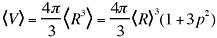


Parameter[0] (scale) and Parameter[3] (contrast) are multiplicative factors in the model and are perfectly correlated. Only one of these parameters should be left free during model fitting.

## Reference

Kotlarchyk, M.; Chen, S.-H. J. Chem. Phys., 1983, 79, 2461.


In [ ]:
# Definition of model parameters
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
R = esc.par("Mean Radius", 60, units=esc.angstr)
P = esc.par("Polydispersity", 0.12, userlim=[0, 1])
VF = esc.par("Volume fraction", 0.1, userlim=[0, 1])
rho = esc.par("Contrast", 1, scale=2e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

# Model equations
r=esc.par("Radius", 60, userlim=[-float("inf"), -float("inf")], units=esc.angstr)

w=P*np.sqrt(3)*R
cond = esc.abs(r-R)<=w

#distribution function
D = esc.conditional(cond, 1/(2*w), 0.0)

V = 4/3 * np.pi*R**3*(1+3*P**2)

QR = q*r
F = 3*V*rho*(esc.sin(QR)-QR*esc.cos(QR))/esc.pow(QR, 3)
P = I0/V*esc.average(F**2, D, r, R, R-w, R+w, epsrel=1e-8, epsabs=1e-8, maxiter=50)+bkgr


show(P, coordinates=np.linspace(0.001, 0.7, 128), figtitle="PolyRectSphere", 
     xlog=True, ylog=True, xlabel=f"Q[{esc.angstr}⁻¹]", ylabel="P(q)[cm⁻¹]")